# Final Project: Examining the Impact of Race, Sex, and Age on Arrests and Strip Searches in Toronto




<center> Master of Information: INF2178<br>
Professor: Shion Guha<br>
Group1: Shaochenzi Wang ; Shiqing Lu<br>
Date: April 16, 2023<br>
 </center>

## 0 Research Question
* Does the perceived race of an individual influence the likelihood of being arrested and/or strip searched, after controlling for age and location of the arrest?
* Does the occurrence category of an arrest influence the likelihood of a strip search, after controlling for perceived race, sex, and age at arrest? 

# 1.0 EDA


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.stats.multicomp as mc

In [136]:
# Load the dataset into a Pandas dataframe,preview the data to see what the categories are
df = pd.read_csv('/Users/Swan/Desktop/inf1344/dataset.csv')
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [137]:
# Get a summary of the numerical columns in the data
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [138]:
# Get a summary of the non-numerical columns in the data
df.describe(include=['O'])

,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [139]:
# Get the number of missing values in each column 
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [140]:
# Remove duplicate records 
df.drop_duplicates(inplace=True)

# Impute missing values with a default value
df['Occurrence_Category'].fillna(df['Occurrence_Category'].mode()[0], inplace=True)
df['Age_group__at_arrest_'].fillna(df['Age_group__at_arrest_'].mode()[0], inplace=True)
df['Perceived_Race'].fillna(df['Perceived_Race'].mode()[0], inplace=True)
df['StripSearch'].fillna(df['StripSearch'].mode()[0], inplace=True)

In [141]:
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         0
Sex                                    0
Age_group__at_arrest_                  0
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                    0
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [142]:
# Updated df
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


# 1.1 Descriptive Statistics


1. Distribution of perceived race among arrested individuals


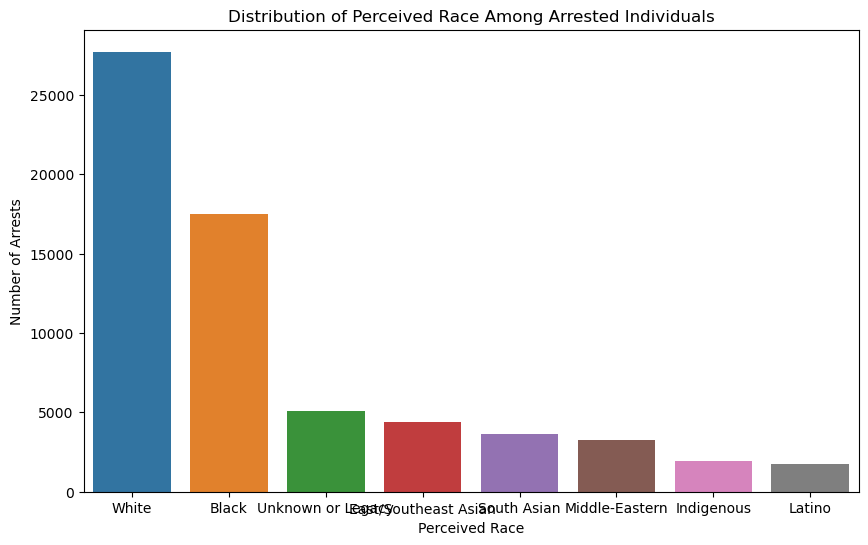

In [143]:
race_counts = df['Perceived_Race'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.xlabel('Perceived Race')
plt.ylabel('Number of Arrests')
plt.title('Distribution of Perceived Race Among Arrested Individuals')
plt.show()

1. category of actions at arrests


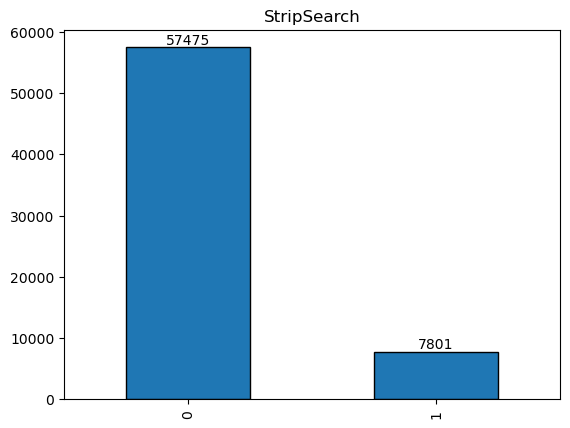

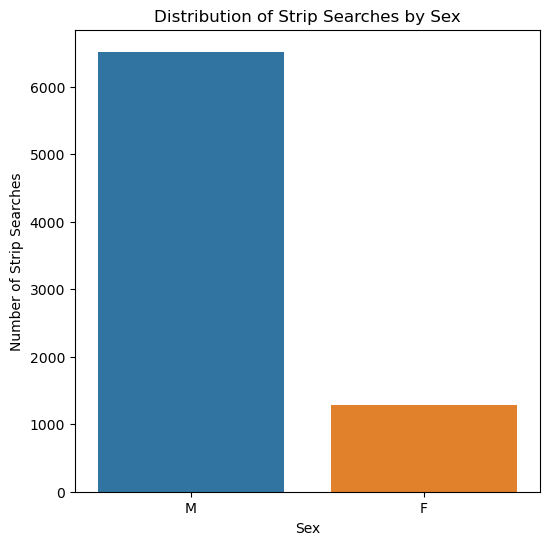

In [144]:
# Create bar plots for the StripSearch column with numbers
df['StripSearch'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('StripSearch')
for i in range(len(df['StripSearch'].value_counts())):
    count = df['StripSearch'].value_counts().values[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

strip_search_by_sex = df[df['StripSearch'] == 1]['Sex'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=strip_search_by_sex.index, y=strip_search_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of Strip Searches')
plt.title('Distribution of Strip Searches by Sex')
plt.show()


3. Distribution of strip searches by perceived race:

In [145]:
print(df['StripSearch'].unique())

[0 1]


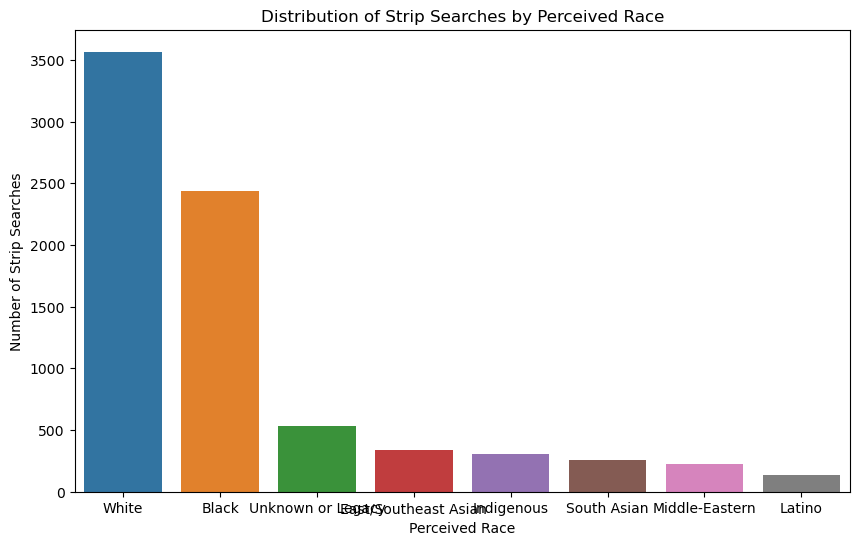

In [146]:
strip_search_by_race = df[df['StripSearch'] == 1]['Perceived_Race'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=strip_search_by_race.index, y=strip_search_by_race.values)
plt.xlabel('Perceived Race')
plt.ylabel('Number of Strip Searches')
plt.title('Distribution of Strip Searches by Perceived Race')
plt.show()

4. Distribution of occurrence categories:

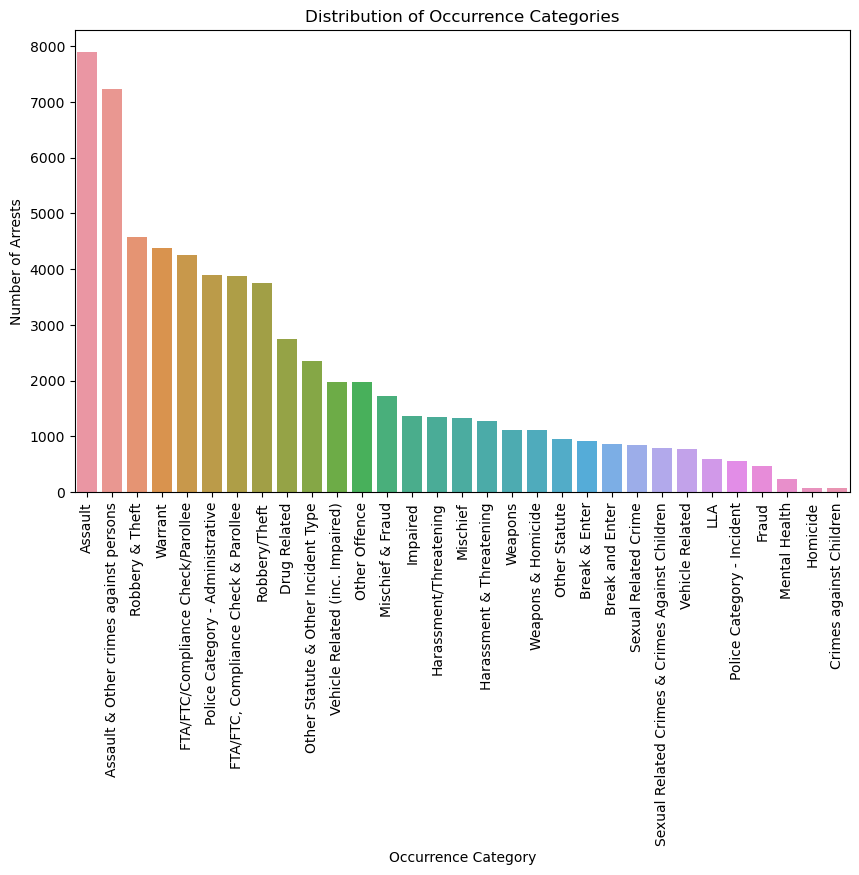

In [147]:
occurrence_counts = df['Occurrence_Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=occurrence_counts.index, y=occurrence_counts.values)
plt.xlabel('Occurrence Category')
plt.ylabel('Number of Arrests')
plt.title('Distribution of Occurrence Categories')
plt.xticks(rotation=90)
plt.show()

5. Distribution of strip searches by occurrence category:



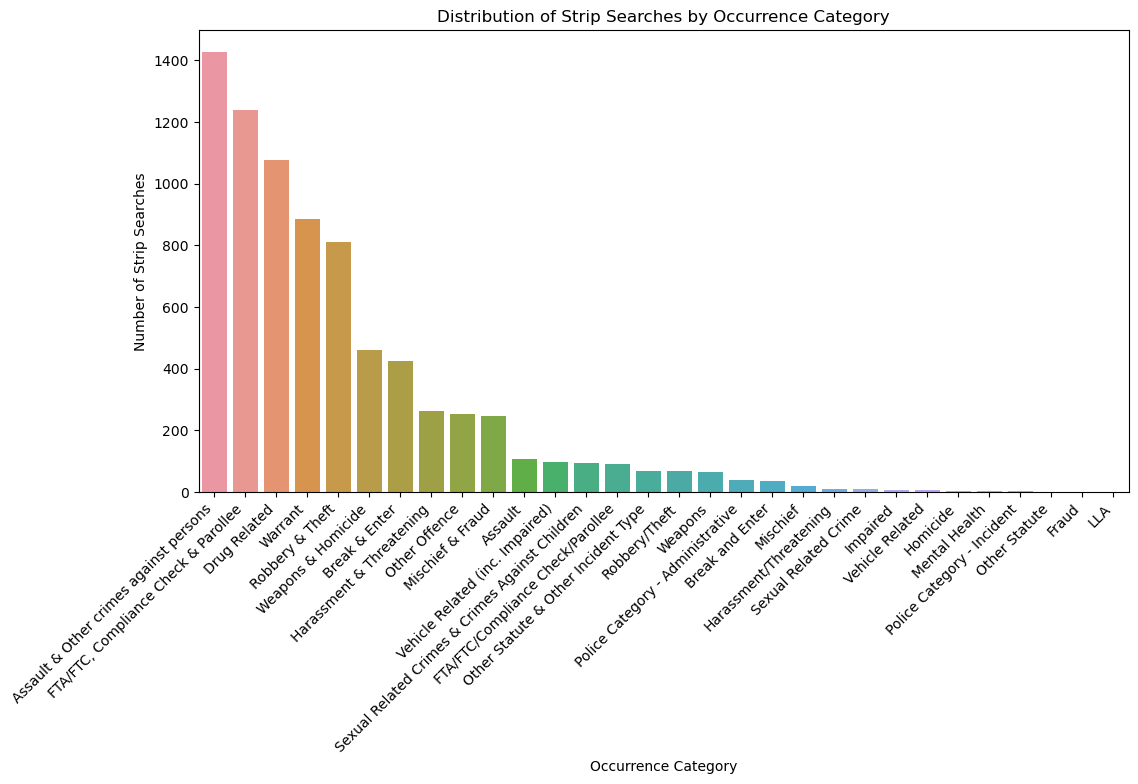

In [148]:
strip_search_by_occurrence = df[df['StripSearch'] == 1]['Occurrence_Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=strip_search_by_occurrence.index, y=strip_search_by_occurrence.values)
plt.xlabel('Occurrence Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Strip Searches')
plt.title('Distribution of Strip Searches by Occurrence Category')
plt.show()


## 1.2 Chi-square

1. Chi-square test for the relationship between perceived race and the likelihood of being strip-searched

In [149]:
# Create a cross-tabulation table
race_strip_search_ct = pd.crosstab(df['Perceived_Race'], df['StripSearch'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(race_strip_search_ct)
print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi2: 384.00389033897886
p-value: 6.411573166704286e-79
Degrees of freedom: 7


2. Chi-square test for the relationship between sex and occurrence categories:

In [150]:
# Create a cross-tabulation table
sex_occurrence_ct = pd.crosstab(df['Sex'], df['Occurrence_Category'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(sex_occurrence_ct)
print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi2: 1070.9269577440002
p-value: 4.591194321744166e-185
Degrees of freedom: 60


## 1.3 Spearman's rank correlation

In [151]:
import scipy.stats as stats

# Convert age group and arrest location division into ordinal variables
df['Age_group_ordinal'] = df['Age_group__at_arrest_'].astype('category').cat.codes
df['ArrestLocDiv_ordinal'] = df['ArrestLocDiv'].astype('category').cat.codes

# Calculate the Spearman's rank correlation
spearman_corr, spearman_p = stats.spearmanr(df['Age_group_ordinal'], df['ArrestLocDiv_ordinal'])
print("Spearman's rank correlation:", spearman_corr)
print("p-value:", spearman_p)


Spearman's rank correlation: -0.005024296605557675
p-value: 0.19926461660708922


# 2.0 Research methods

## 2.1 Power analysis

In [152]:
from statsmodels.stats.power import TTestIndPower


# Filter data for white and black individuals
white_individuals = df[df['Perceived_Race'] == 'White']
black_individuals = df[df['Perceived_Race'] == 'Black']

# Extract strip search rates for each group
white_strip_searched = white_individuals['StripSearch']
black_strip_searched = black_individuals['StripSearch']

# Calculate the effect size using Cohen's D
def pooled_standard_deviation(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    numerator = ((n1 - 1) * var1) + ((n2 - 1) * var2)
    denominator = n1 + n2 - 2
    return np.sqrt(numerator / denominator)

def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    return (u1 - u2) / s_pooled

effect_size = Cohens_d(white_strip_searched, black_strip_searched)
print(f"Effect size (Cohen's D) for strip search rates: {effect_size:.3f}")

# Perform power analysis
alpha = 0.05
power = 0.80
ratio_ = len(white_strip_searched) / len(black_strip_searched)

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print(f"Sample Size of nobs1: {sample_size:.3f} needed for White individuals")
print(f"Actual size of White individuals: {len(white_strip_searched)}")
nobs2 = ratio_ * sample_size
print(f"Sample Size of nobs2: {nobs2:.3f} needed for Black individuals")
print(f"Actual size of Black individuals: {len(black_strip_searched)}")

Effect size (Cohen's D) for strip search rates: -0.030
Sample Size of nobs1: 14071.845 needed for White individuals
Actual size of White individuals: 27727
Sample Size of nobs2: 22262.355 needed for Black individuals
Actual size of Black individuals: 17526


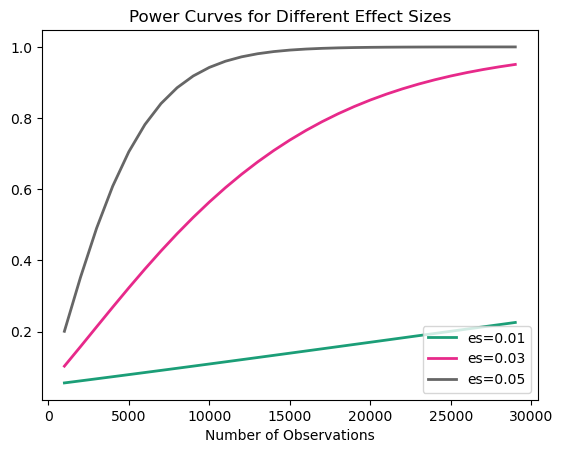

In [153]:

effect_sizes = np.array([0.01, 0.03, 0.05])
sample_sizes = np.array(range(1000, 30000, 1000))

# Initialize TTestIndPower object
analysis = TTestIndPower()

# Plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05)
plt.title("Power Curves for Different Effect Sizes")
plt.show()


## 2.2 ONE-way ANCOVA

In [158]:
!pip install pingouin
import pandas as pd
import numpy as np
from pingouin import ancova

# Create a new dataframe with the relevant columns
df_rq1 = df[['Perceived_Race', 'Age_group__at_arrest_', 'ArrestLocDiv', 'StripSearch']].copy()

# Convert the 'age_group__at_arrest_' column into a continuous variable by assigning the average age for each age group
age_group_mapping = {
    'Aged 17 years and under': 16,
    'Aged 18 to 24 years': 21,
    'Aged 25 to 34 years': 29,
    'Aged 35 to 44 years': 39,
    'Aged 45 to 54 years': 49,
    'Aged 55 to 64 years': 59,
    'Aged 65 years and older': 70
}
df_rq1['average_age'] = df_rq1['Age_group__at_arrest_'].replace(age_group_mapping)

# Ensure that the 'average_age' column is a numeric data type
df_rq1['average_age'] = pd.to_numeric(df_rq1['average_age'], errors='coerce')

# Convert the 'strip_search' column into a continuous variable (e.g., proportion of strip searches per race per age group in each location)
df_rq1['strip_search_proportion'] = df_rq1.groupby(['Perceived_Race', 'average_age', 'ArrestLocDiv'])['StripSearch'].transform('mean')

# Run ANCOVA with the transformed continuous variable
result = ancova(data=df_rq1, dv='strip_search_proportion', covar='average_age', between='Perceived_Race')
print(result)


Defaulting to user installation because normal site-packages is not writeable
           Source          SS     DF            F          p-unc       np2
0  Perceived_Race   40.280669      7   708.461744   0.000000e+00  0.073014
1     average_age   11.952446      1  1471.548491  2.864662e-318  0.022838
2        Residual  511.400021  62962          NaN            NaN       NaN


## 2.3 Logistic Regression 

In [166]:
df['Occurrence_Category'].unique()


array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [167]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

# Create a mapping for Occurrence_Category_ordinal
occurrence_mapping = {
    'Assault & Other crimes against persons': 1,
    'Harassment/Threatening': 2,
    'FTA/FTC/Compliance Check/Parollee': 3,
    'Assault': 4,
    'Robbery/Theft': 5,
    'Sexual Related Crime': 6,
    'Mischief & Fraud': 7,
    'Warrant': 8,
    'Police Category - Administrative': 9,
    'Robbery & Theft': 10,
    'FTA/FTC, Compliance Check & Parollee': 11,
    'Drug Related': 12,
    'Weapons': 13,
    'Vehicle Related (inc. Impaired)': 14,
    'Other Offence': 15,
    'Harassment & Threatening': 16,
    'Weapons & Homicide': 17,
    'Break and Enter': 18,
    'Mischief': 19,
    'Break & Enter': 20,
    'Sexual Related Crimes & Crimes Against Children': 21,
    'Crimes against Children': 22,
    'Police Category - Incident': 23,
    'Fraud': 24,
    'LLA': 25,
    'Mental Health': 26,
    'Other Statute': 27,
    'Vehicle Related': 28,
    'Other Statute & Other Incident Type': 29,
    'Impaired': 30,
    'Homicide': 31,
}

# Map the occurrence category to an ordinal variable
df['Occurrence_Category_ordinal'] = df['Occurrence_Category'].map(occurrence_mapping)

# Get list of all the Perceived_Race dummy variables
Perceived_Race = list(df.columns[df.columns.str.startswith('Perceived_Race')])

# Prepare the data
df['age_numeric'] = df['Age_group__at_arrest_'].map(age_group_mapping)

# Create the logistic regression model
formula = 'StripSearch ~ age_numeric + Sex + Occurrence_Category_ordinal + ' + ' + '.join(Perceived_Race)
model = sm.Logit.from_formula(formula, data=df)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Get the odds ratios and their confidence intervals
odds_ratios = np.exp(result.params)
ci_low, ci_high = np.exp(result.conf_int())

# Print the odds ratios and their confidence intervals
for i in range(len(odds_ratios)):
    print(f'{odds_ratios.index[i]}: {odds_ratios[i]}')
    if isinstance(ci_low, int) or isinstance(ci_high, int):
        print('Confidence interval not available')
    else:
        print(f'({ci_low[i]}, {ci_high[i]})')

# Get the predicted probabilities and calculate the prediction interval
xx = sm.add_constant(df.drop(columns=['StripSearch']))
pred_probs = result.predict(xx)
pi_low, pi_high = proportion_confint(np.round(pred_probs * len(df)), len(df), alpha=0.05, method='beta')
print(f'Prediction Interval: ({pi_low.min()}, {pi_high.max()})')


Optimization terminated successfully.
         Current function value: 0.360297
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                62971
Model:                          Logit   Df Residuals:                    62959
Method:                           MLE   Df Model:                           11
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.01316
Time:                        17:30:55   Log-Likelihood:                -22688.
converged:                       True   LL-Null:                       -22991.
Covariance Type:            nonrobust   LLR p-value:                1.187e-122
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.6115  

C:\Users\Swan\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Prediction Interval: (0.0, 0.21237559791255434)


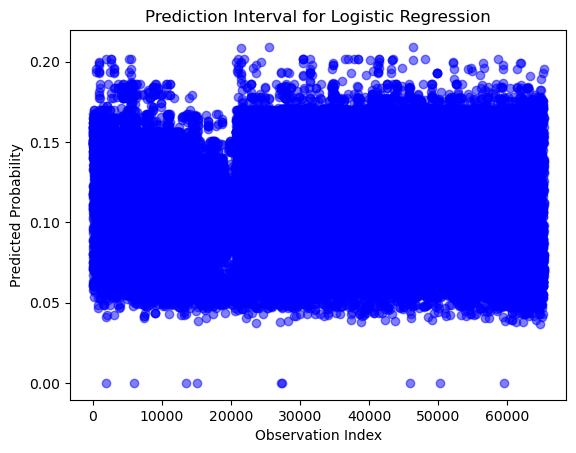

In [168]:
import matplotlib.pyplot as plt

# Get the predicted probabilities and calculate the prediction interval
xx = sm.add_constant(df.drop(columns=['StripSearch']))
pred_probs = result.predict(xx)
pi_low, pi_high = stats.t.interval(0.95, len(df)-1, loc=pred_probs, scale=stats.sem(pred_probs))

# Plot the predicted probabilities and prediction interval
plt.scatter(pred_probs.index, pred_probs.values, color='blue', alpha=0.5)
plt.fill_between(pred_probs.index, pi_low, pi_high, color='gray', alpha=0.2)
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.title('Prediction Interval for Logistic Regression')
plt.show()
